In [5]:
!pwd

/content


In [6]:
cd drive/MyDrive

/content/drive/MyDrive


In [7]:
cd nlp100/chapter05

/content/drive/MyDrive/nlp100/chapter05


In [19]:
!pip install fonts-ipafont-gothic

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement fonts-ipafont-gothic (from versions: none)
ERROR: No matching distribution found for fonts-ipafont-gothic


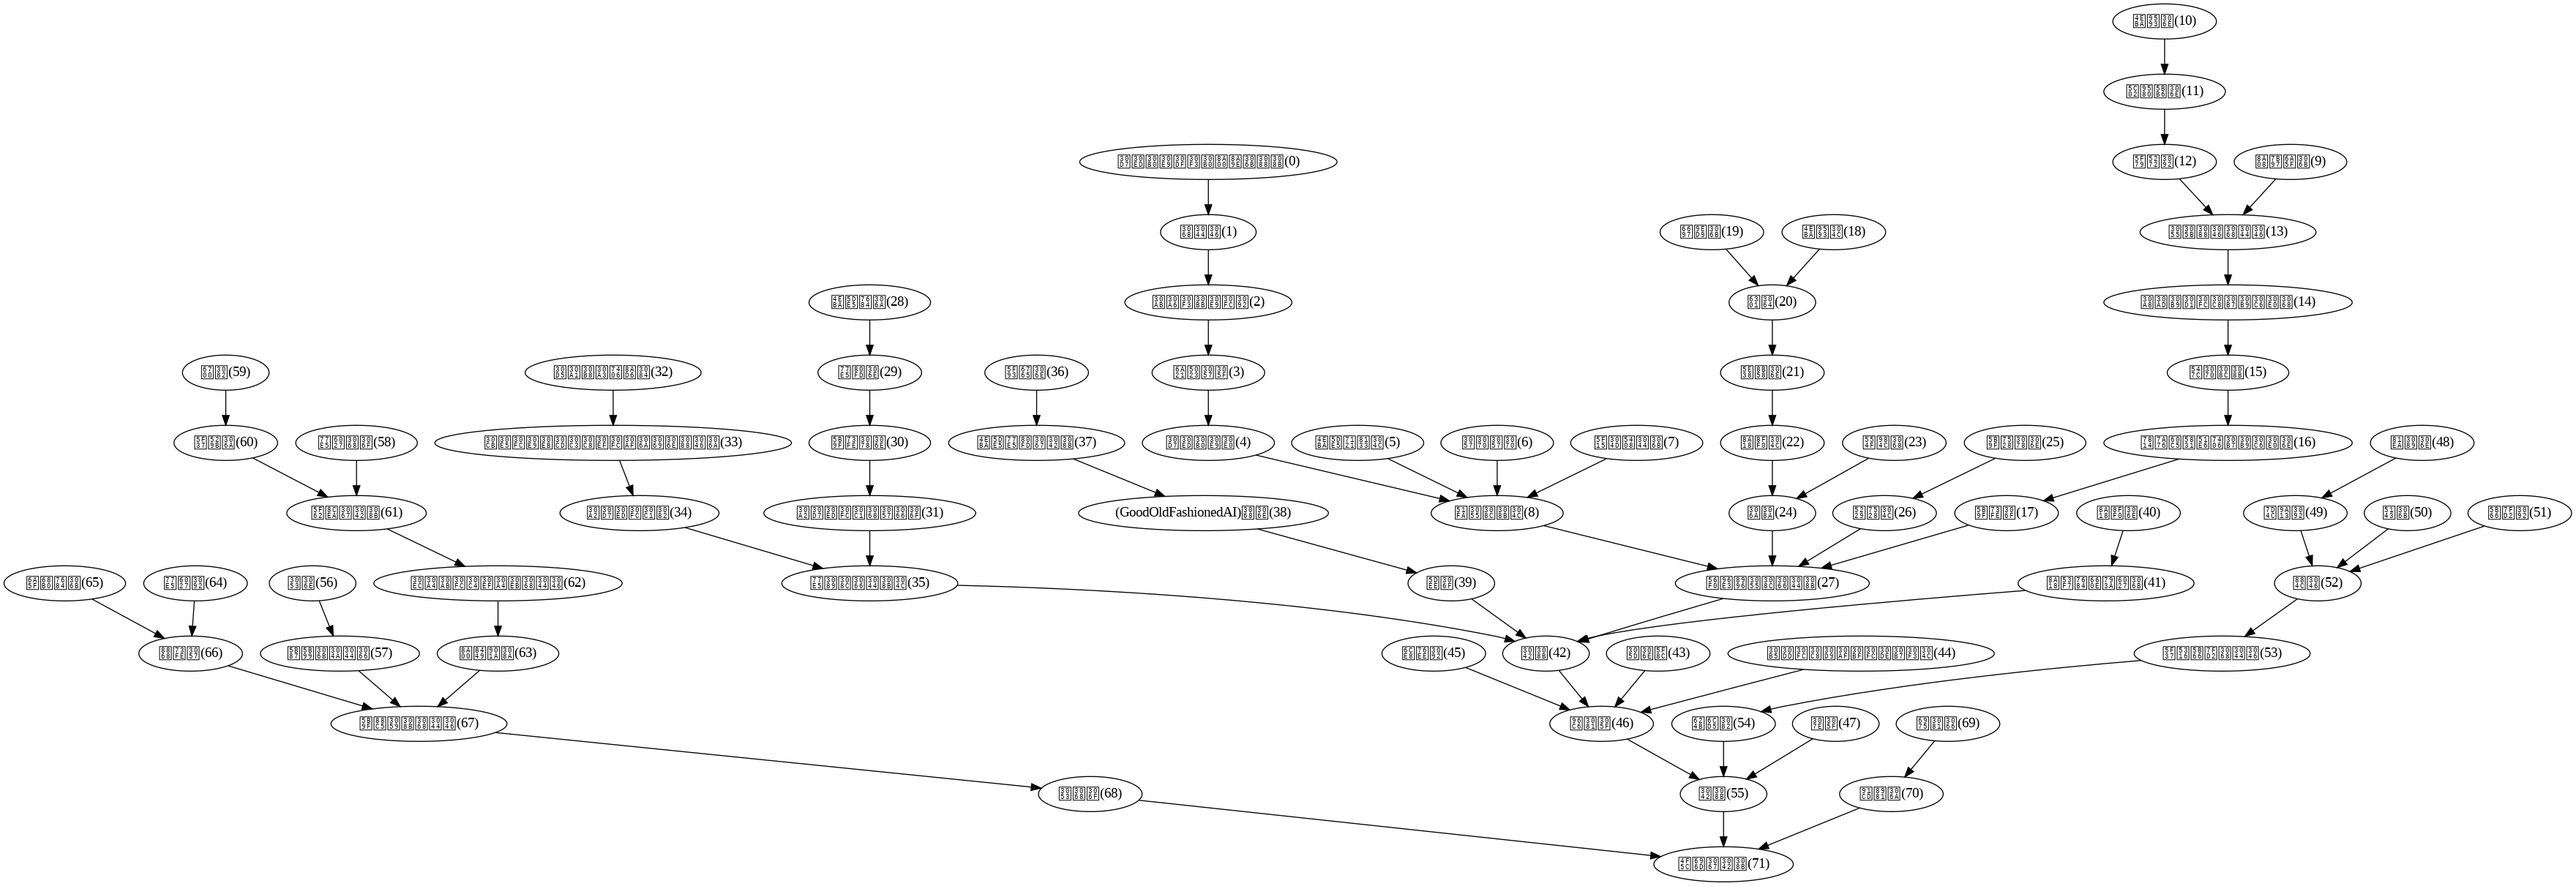

In [18]:
# knock44

class Morph:
    def __init__(self, surface, base, pos, pos1):
        self.surface = surface
        self.base    = base
        self.pos     = pos
        self.pos1    = pos1

class Chunk:
    def __init__(self, morphs, dst):
        self.morphs = morphs
        self.dst    = dst
        self.srcs   = []

sentences = []
sentence = []
morphs  = []
dst = 0
# Morphオブジェクトいれてく
with open('ai.ja.txt.parsed') as f:
    for line in f:
        if line != 'EOS\n':
            if line[0] == '*':
                if morphs != []:
                    sentence.append(Chunk(morphs, dst))
                    morphs = []
                dst = int(line.split()[2].replace("D", ""))
            else:
                left = line.split('\t')[0]
                right = line.split('\t')[1].split(',')
                morphs.append(Morph(left, right[6], right[0], right[1]))
        else:
            sentence.append(Chunk(morphs, dst))
            sentences.append(sentence)
            morphs = []
            sentence = []

    for sentence in sentences:
        for i, chunk in enumerate(sentence):
            if chunk.dst != -1:
                sentence[chunk.dst].srcs.append(i)

import pydot
from IPython.display import Image, display_png
from graphviz import Digraph

#ここから
sentence = sentences[7]
edges = []
for id, chunk in enumerate(sentence):
    if int(chunk.dst) != -1:
        modifier = ''.join([morph.surface if morph.pos != '記号' else '' for morph in chunk.morphs] + ['(' + str(id) + ')'])
        modifiee = ''.join([morph.surface if morph.pos != '記号' else '' for morph in sentence[int(chunk.dst)].morphs] + ['(' + str(chunk.dst) + ')'])
        edges.append([modifier, modifiee])
n = pydot.Node('node')
n.fontname = 'IPAGothic'
g = pydot.graph_from_edges(edges, directed=True)
g.add_node(n)
g.write_png('44.png')
display_png(Image('44.png'))



In [23]:
# knock45

with open('45.txt', 'w') as f:
  for sentence in sentences:
    for chunk in sentence:
      for morph in chunk.morphs:
        if morph.pos == "動詞":
          particles = []
          # 助詞を探す
          for src in chunk.srcs:
            particles = particles + [morph.surface for morph in sentence[src].morphs if morph.pos == "助詞"]
          if len(particles) != 0:
            particles = sorted(list(set(particles)))
            f.write(morph.base + "\t" + ' '.join(particles) + "\n")
          break

In [26]:
!cat 45.txt | sort | uniq -c | sort -nr | head -n 10
!cat ./45.txt | grep '行う' | sort | uniq -c | sort -nr | head -n 5
!cat ./45.txt | grep 'なる' | sort | uniq -c | sort -nr | head -n 5
!cat ./45.txt | grep '与える' | sort | uniq -c | sort -nr | head -n 5

     49 する	を
     19 する	が
     15 する	に
     15 する	と
     12 する	は を
     10 する	に を
      9 よる	に
      9 する	で を
      8 行う	を
      8 する	が に
      8 行う	を
      1 行う	まで を
      1 行う	は を をめぐって
      1 行う	は を
      1 行う	に を
      3 なる	に は
      3 なる	が と
      2 なる	に
      2 なる	と
      1 異なる	も
      1 与える	に は を
      1 与える	が に
      1 与える	が など に


In [27]:
# knock46

with open('46.txt', 'w') as f:
  for sentence in sentences:
    for chunk in sentence:
      for morph in chunk.morphs:
        if morph.pos == "動詞":
          particles = []
          chunks = []
          # 助詞を探す
          for src in chunk.srcs:
            particle = [morph.surface for morph in sentence[src].morphs if morph.pos == "助詞"]
            if len(particle) != 0:
              particles = particles + particle
              chunks.append(''.join(morph.surface for morph in sentence[src].morphs if morph.pos != '記号'))
          if len(particles) != 0:
            particles = sorted(list(set(particles)))
            f.write(morph.base + "\t" + ' '.join(particles) + "\t" + ' '.join(chunks) + "\n")
          break

In [28]:
! cat 46.txt | head -n 10

用いる	を	道具を
する	て を	用いて 知能を
指す	を	一分野を
代わる	に を	知的行動を 人間に
行う	て に	代わって コンピューターに
する	と も	研究分野とも
述べる	で に の は	解説で 佐藤理史は 次のように
する	で を	知的能力を コンピュータ上で
する	を	推論判断を
する	を	画像データを


In [29]:
# knock47

# knock46

with open('47.txt', 'w') as f:
  for sentence in sentences:
    for chunk in sentence:
      for morph in chunk.morphs:
        if morph.pos == "動詞":
          for i, src in enumerate(chunk.srcs):
            # サ変接続名詞+を　か見る
            if len(sentence[src].morphs) == 2 and sentence[src].morphs[0].pos1 == "サ変接続" and sentence[src].morphs[1].surface == "を":
              predicate = ''.join([sentence[src].morphs[0].surface, sentence[src].morphs[1].surface, morph.base])
              particles = []
              chunks = []
              # 助詞を探す
              for src in chunk.srcs[:i] + chunk.srcs[i+1:]:
                particle = [morph.surface for morph in sentence[src].morphs if morph.pos == "助詞"]
                if len(particle) != 0:
                  particles = particles + particle
                  chunks.append(''.join(morph.surface for morph in sentence[src].morphs if morph.pos != '記号'))
              if len(particles) != 0:
                particles = sorted(list(set(particles)))
                f.write(predicate + "\t" + ' '.join(particles) + "\t" + ' '.join(chunks) + "\n")
              break

In [30]:
!cat 47.txt | cut -f 1 | sort | uniq -c | sort -nr | head -n 10
!cat 47.txt | cut -f 1,2 | sort | uniq -c | sort -nr | head -n 10

      3 注目を集める
      2 運転をする
      2 研究をいる
      1 開発を行う
      1 進化を見せる
      1 進化をいる
      1 追及を受ける
      1 議論を行う
      1 議論をくる
      1 話をする
      1 開発を行う	は
      1 運転をする	に
      1 運転をする	て に
      1 進化を見せる	て において は
      1 進化をいる	て において は
      1 追及を受ける	て で と とともに は
      1 議論を行う	まで
      1 議論をくる	まで
      1 話をする	は
      1 話をいる	は


In [31]:
# knock48

sentence = sentences[2]
for chunk in sentence:
  if "名詞" in [morph.pos for morph in chunk.morphs]:
    path = [''.join(morph.surface for morph in chunk.morphs if morph.pos != "記号")]
    while chunk.dst != -1:
      path.append(''.join(morph.surface for morph in sentence[chunk.dst].morphs if morph.pos != "記号"))
      chunk = sentence[chunk.dst]
    print(" -> ".join(path))

人工知能 -> 語 -> 研究分野とも -> される
じんこうちのう -> 語 -> 研究分野とも -> される
AI -> エーアイとは -> 語 -> 研究分野とも -> される
エーアイとは -> 語 -> 研究分野とも -> される
計算 -> という -> 道具を -> 用いて -> 研究する -> 計算機科学 -> の -> 一分野を -> 指す -> 語 -> 研究分野とも -> される
概念と -> 道具を -> 用いて -> 研究する -> 計算機科学 -> の -> 一分野を -> 指す -> 語 -> 研究分野とも -> される
コンピュータ -> という -> 道具を -> 用いて -> 研究する -> 計算機科学 -> の -> 一分野を -> 指す -> 語 -> 研究分野とも -> される
道具を -> 用いて -> 研究する -> 計算機科学 -> の -> 一分野を -> 指す -> 語 -> 研究分野とも -> される
知能を -> 研究する -> 計算機科学 -> の -> 一分野を -> 指す -> 語 -> 研究分野とも -> される
研究する -> 計算機科学 -> の -> 一分野を -> 指す -> 語 -> 研究分野とも -> される
計算機科学 -> の -> 一分野を -> 指す -> 語 -> 研究分野とも -> される
一分野を -> 指す -> 語 -> 研究分野とも -> される
語 -> 研究分野とも -> される
言語の -> 推論 -> 問題解決などの -> 知的行動を -> 代わって -> 行わせる -> 技術または -> 研究分野とも -> される
理解や -> 推論 -> 問題解決などの -> 知的行動を -> 代わって -> 行わせる -> 技術または -> 研究分野とも -> される
推論 -> 問題解決などの -> 知的行動を -> 代わって -> 行わせる -> 技術または -> 研究分野とも -> される
問題解決などの -> 知的行動を -> 代わって -> 行わせる -> 技術または -> 研究分野とも -> される
知的行動を -> 代わって -> 行わせる -> 技術または -> 研究分野とも -> される
人間に -> 代わって -> 行わせる -> 技術または -> 研究

In [33]:
# knock49
from itertools import combinations
import re

# knock48

sentence = sentences[2]
nouns = []
for i, chunk in enumerate(sentence):
  if "名詞" in [morph.pos for morph in chunk.morphs]:
    nouns.append(i)
# 文節のペアごとに出力
for i, j in combinations(nouns, 2):
  pathi = []
  pathj = []
  while i != j:
    if i < j:
      pathi.append(i)
      i = sentence[i].dst
    else:
      pathj.append(j)
      j = sentence[j].dst
  if len(pathj) == 0:
    chunkX = ''.join([morph.surface if morph.pos != '名詞' else 'X' for morph in sentence[pathi[0]].morphs])
    chunkY = ''.join([morph.surface if morph.pos != '名詞' else 'Y' for morph in sentence[i].morphs])
    chunkX = re.sub(r'X+', 'X', chunkX)
    chunkY = re.sub(r'Y+', 'Y', chunkY)
    path = [chunkX] + [''.join(morph.surface for morph in sentence[n].morphs) for n in pathi[1:]] + [chunkY]
    print(" -> ".join(path))
  else:
    chunkX = ''.join([morph.surface if morph.pos != '名詞' else 'X' for morph in sentence[pathi[0]].morphs])
    chunkY = ''.join([morph.surface if morph.pos != '名詞' else 'Y' for morph in sentence[pathj[0]].morphs])
    chunkX = re.sub(r'X+', 'X', chunkX)
    chunkY = re.sub(r'Y+', 'Y', chunkY)
    chunkK = ''.join([morph.surface for morph in sentence[i].morphs])
    pathX = [chunkX] + [''.join(morph.surface for morph in sentence[n].morphs) for n in pathi[1:]]
    pathY = [chunkY] + [''.join(morph.surface for morph in sentence[n].morphs) for n in pathj[1:]]
    print(' | '.join([' -> '.join(pathX), ' -> '.join(pathY), chunkK]))

X | （Yのう、、 | 語。
X | Y -> 〈エーアイ〉）とは、 | 語。
X | 〈Y〉）とは、 | 語。
X | 「『Y -> （）』という -> 道具を -> 用いて -> 研究する -> 計算機科学 -> （）の -> 一分野」を -> 指す | 語。
X | Yと -> 道具を -> 用いて -> 研究する -> 計算機科学 -> （）の -> 一分野」を -> 指す | 語。
X | 『Y -> （）』という -> 道具を -> 用いて -> 研究する -> 計算機科学 -> （）の -> 一分野」を -> 指す | 語。
X | Yを -> 用いて -> 研究する -> 計算機科学 -> （）の -> 一分野」を -> 指す | 語。
X | 『Y』を -> 研究する -> 計算機科学 -> （）の -> 一分野」を -> 指す | 語。
X | Yする -> 計算機科学 -> （）の -> 一分野」を -> 指す | 語。
X | Y -> （）の -> 一分野」を -> 指す | 語。
X | Y」を -> 指す | 語。
X -> Y。
X -> 語。 | 「Yの -> 推論、 -> 問題解決などの -> 知的行動を -> 代わって -> 行わせる -> 技術」、または、 | 研究分野」とも
X -> 語。 | Yや -> 推論、 -> 問題解決などの -> 知的行動を -> 代わって -> 行わせる -> 技術」、または、 | 研究分野」とも
X -> 語。 | Y、 -> 問題解決などの -> 知的行動を -> 代わって -> 行わせる -> 技術」、または、 | 研究分野」とも
X -> 語。 | Yなどの -> 知的行動を -> 代わって -> 行わせる -> 技術」、または、 | 研究分野」とも
X -> 語。 | Yを -> 代わって -> 行わせる -> 技術」、または、 | 研究分野」とも
X -> 語。 | Yに -> 代わって -> 行わせる -> 技術」、または、 | 研究分野」とも
X -> 語。 | Yに -> 行わせる -> 技術」、または、 | 研究分野」とも
X -> 語。 | Y」、または、 | 研究分野」とも
X -> 語。 | 「Y -> （コンピュータ）による -> 情報処理システムの -> 実現に関